Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **37 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "MUHAMMAD ABDURREHMAN ASIF"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Heaps and Heapsort


## Question 1 [time estimate: 10 minutes]

Given the array `H=[39, 85, 85, 16, 49, 7, 49, 92, 76, 15, 21, 30, 29, 31, 28]`, perform the following operations:
1. Draw the corresponding binary tree of H. Is the binary tree a valid max heap? Explain your answer.
2. Using as a model the drawing examples illustrated in Figure 6.2 of Cormen et al.,  draw a step-by-step transformation of the array above into a valid max heap. 
3. Now that you have obtained a valid max heap, write out the corresponding array that stores the valid max-heap.

Use as many cells as you wish for this question.

In [71]:
cd C:\Users\abdur\OneDrive\Documents\CS110 PCW\cs110 pcw 4.2

C:\Users\abdur\OneDrive\Documents\CS110 PCW\cs110 pcw 4.2


1) The binary tree is not a valid max heap. This is because there are children leaves which are larger in magnitude than their parent nodes.The root must also be the biggest element in the max heap as well and here we can clearly see 39 < 85. 92 is a leaf at depth 3 (starting indexing from 0) and this is the largest heap, thus this and other wrongly placed elements need to be assigned to their correct positions for this to be a valid max heap. 

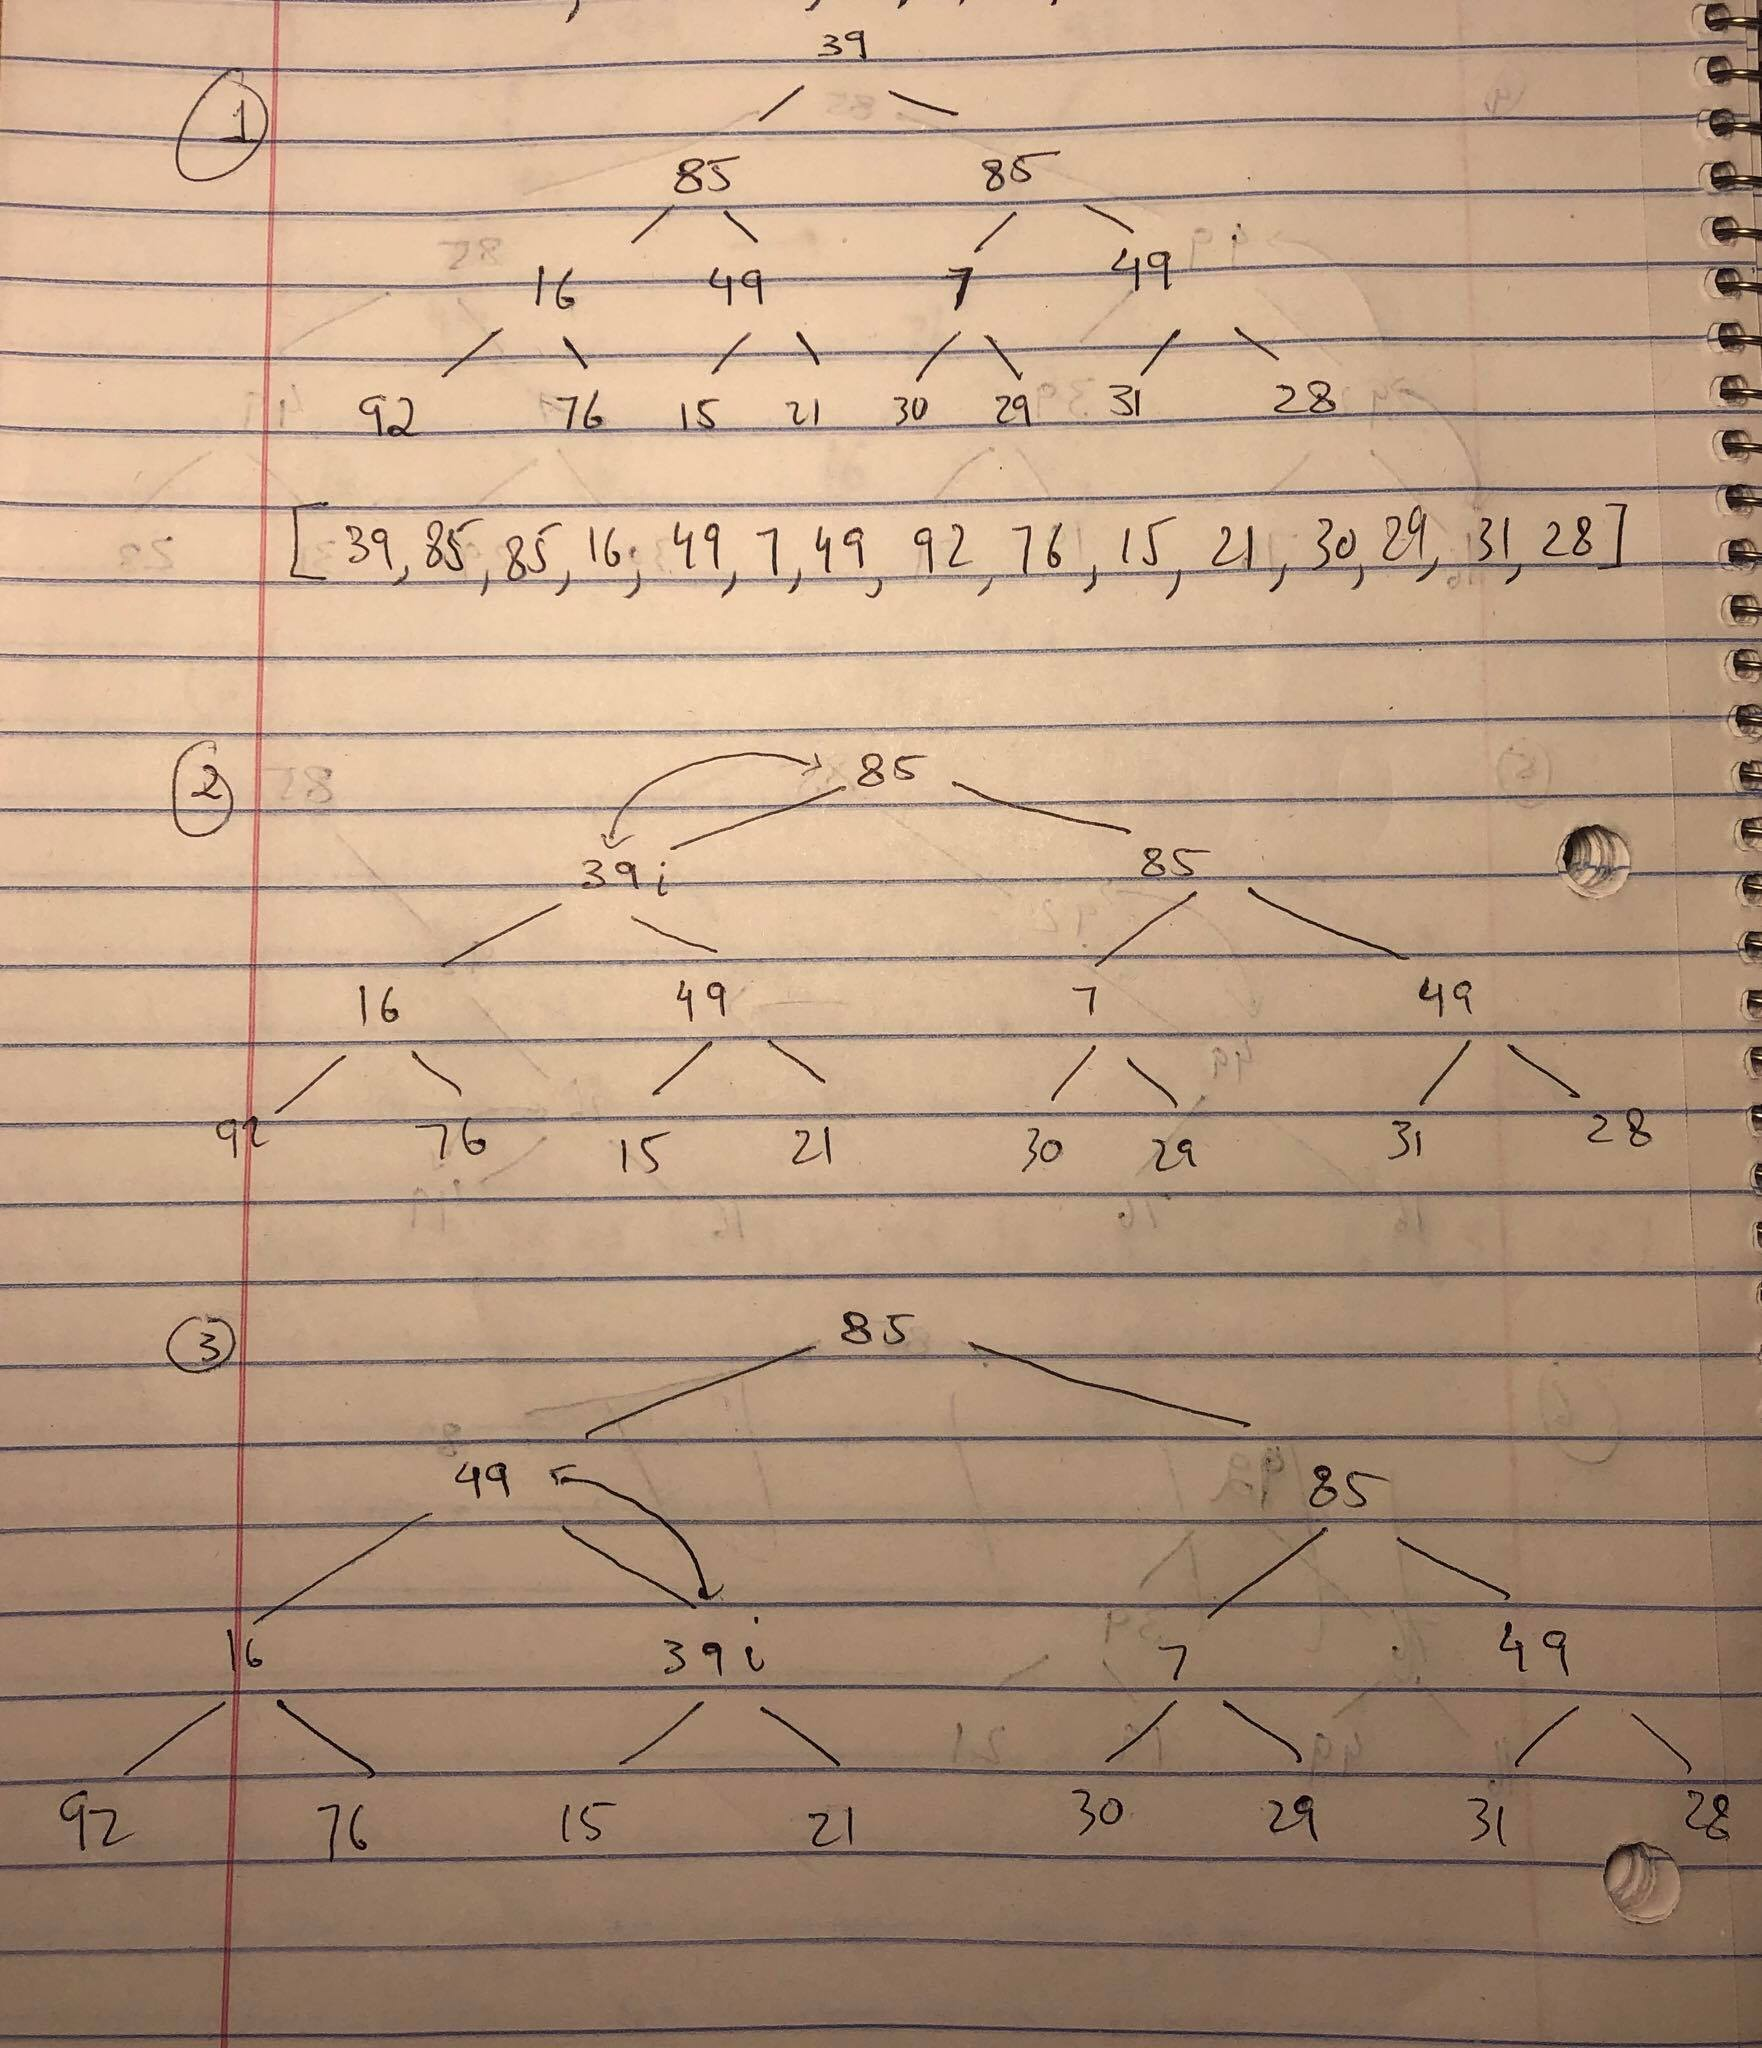

In [70]:
from IPython.display import Image
Image(filename='heap1.jpg')



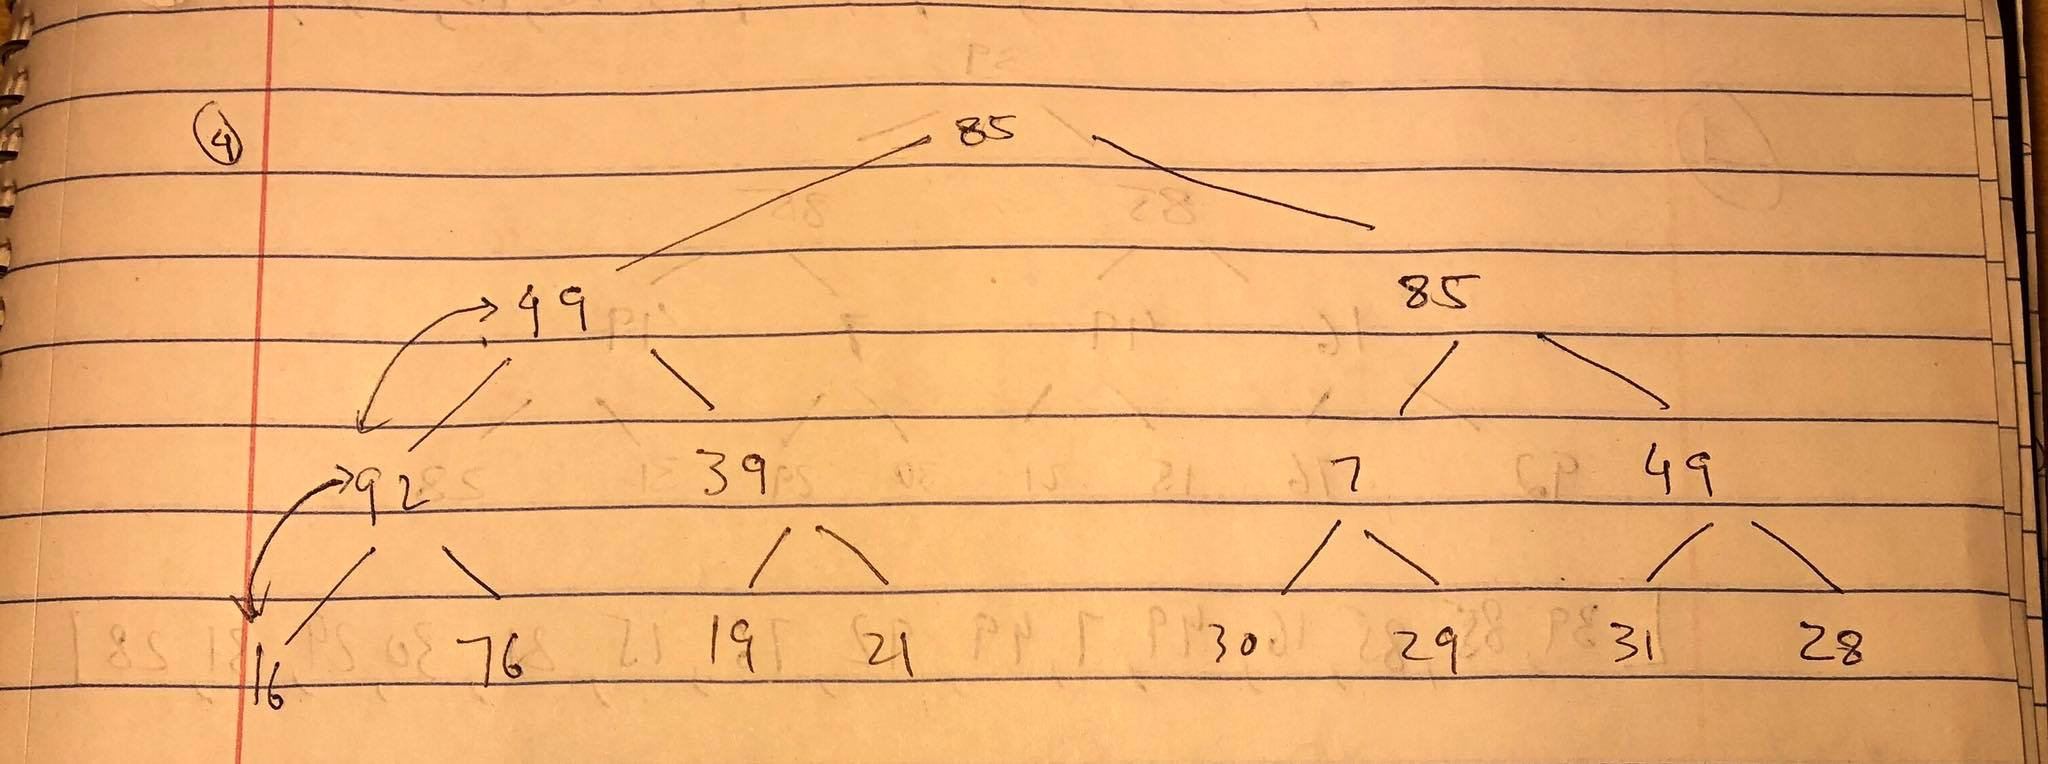

In [68]:
Image(filename='heap2.jpg')

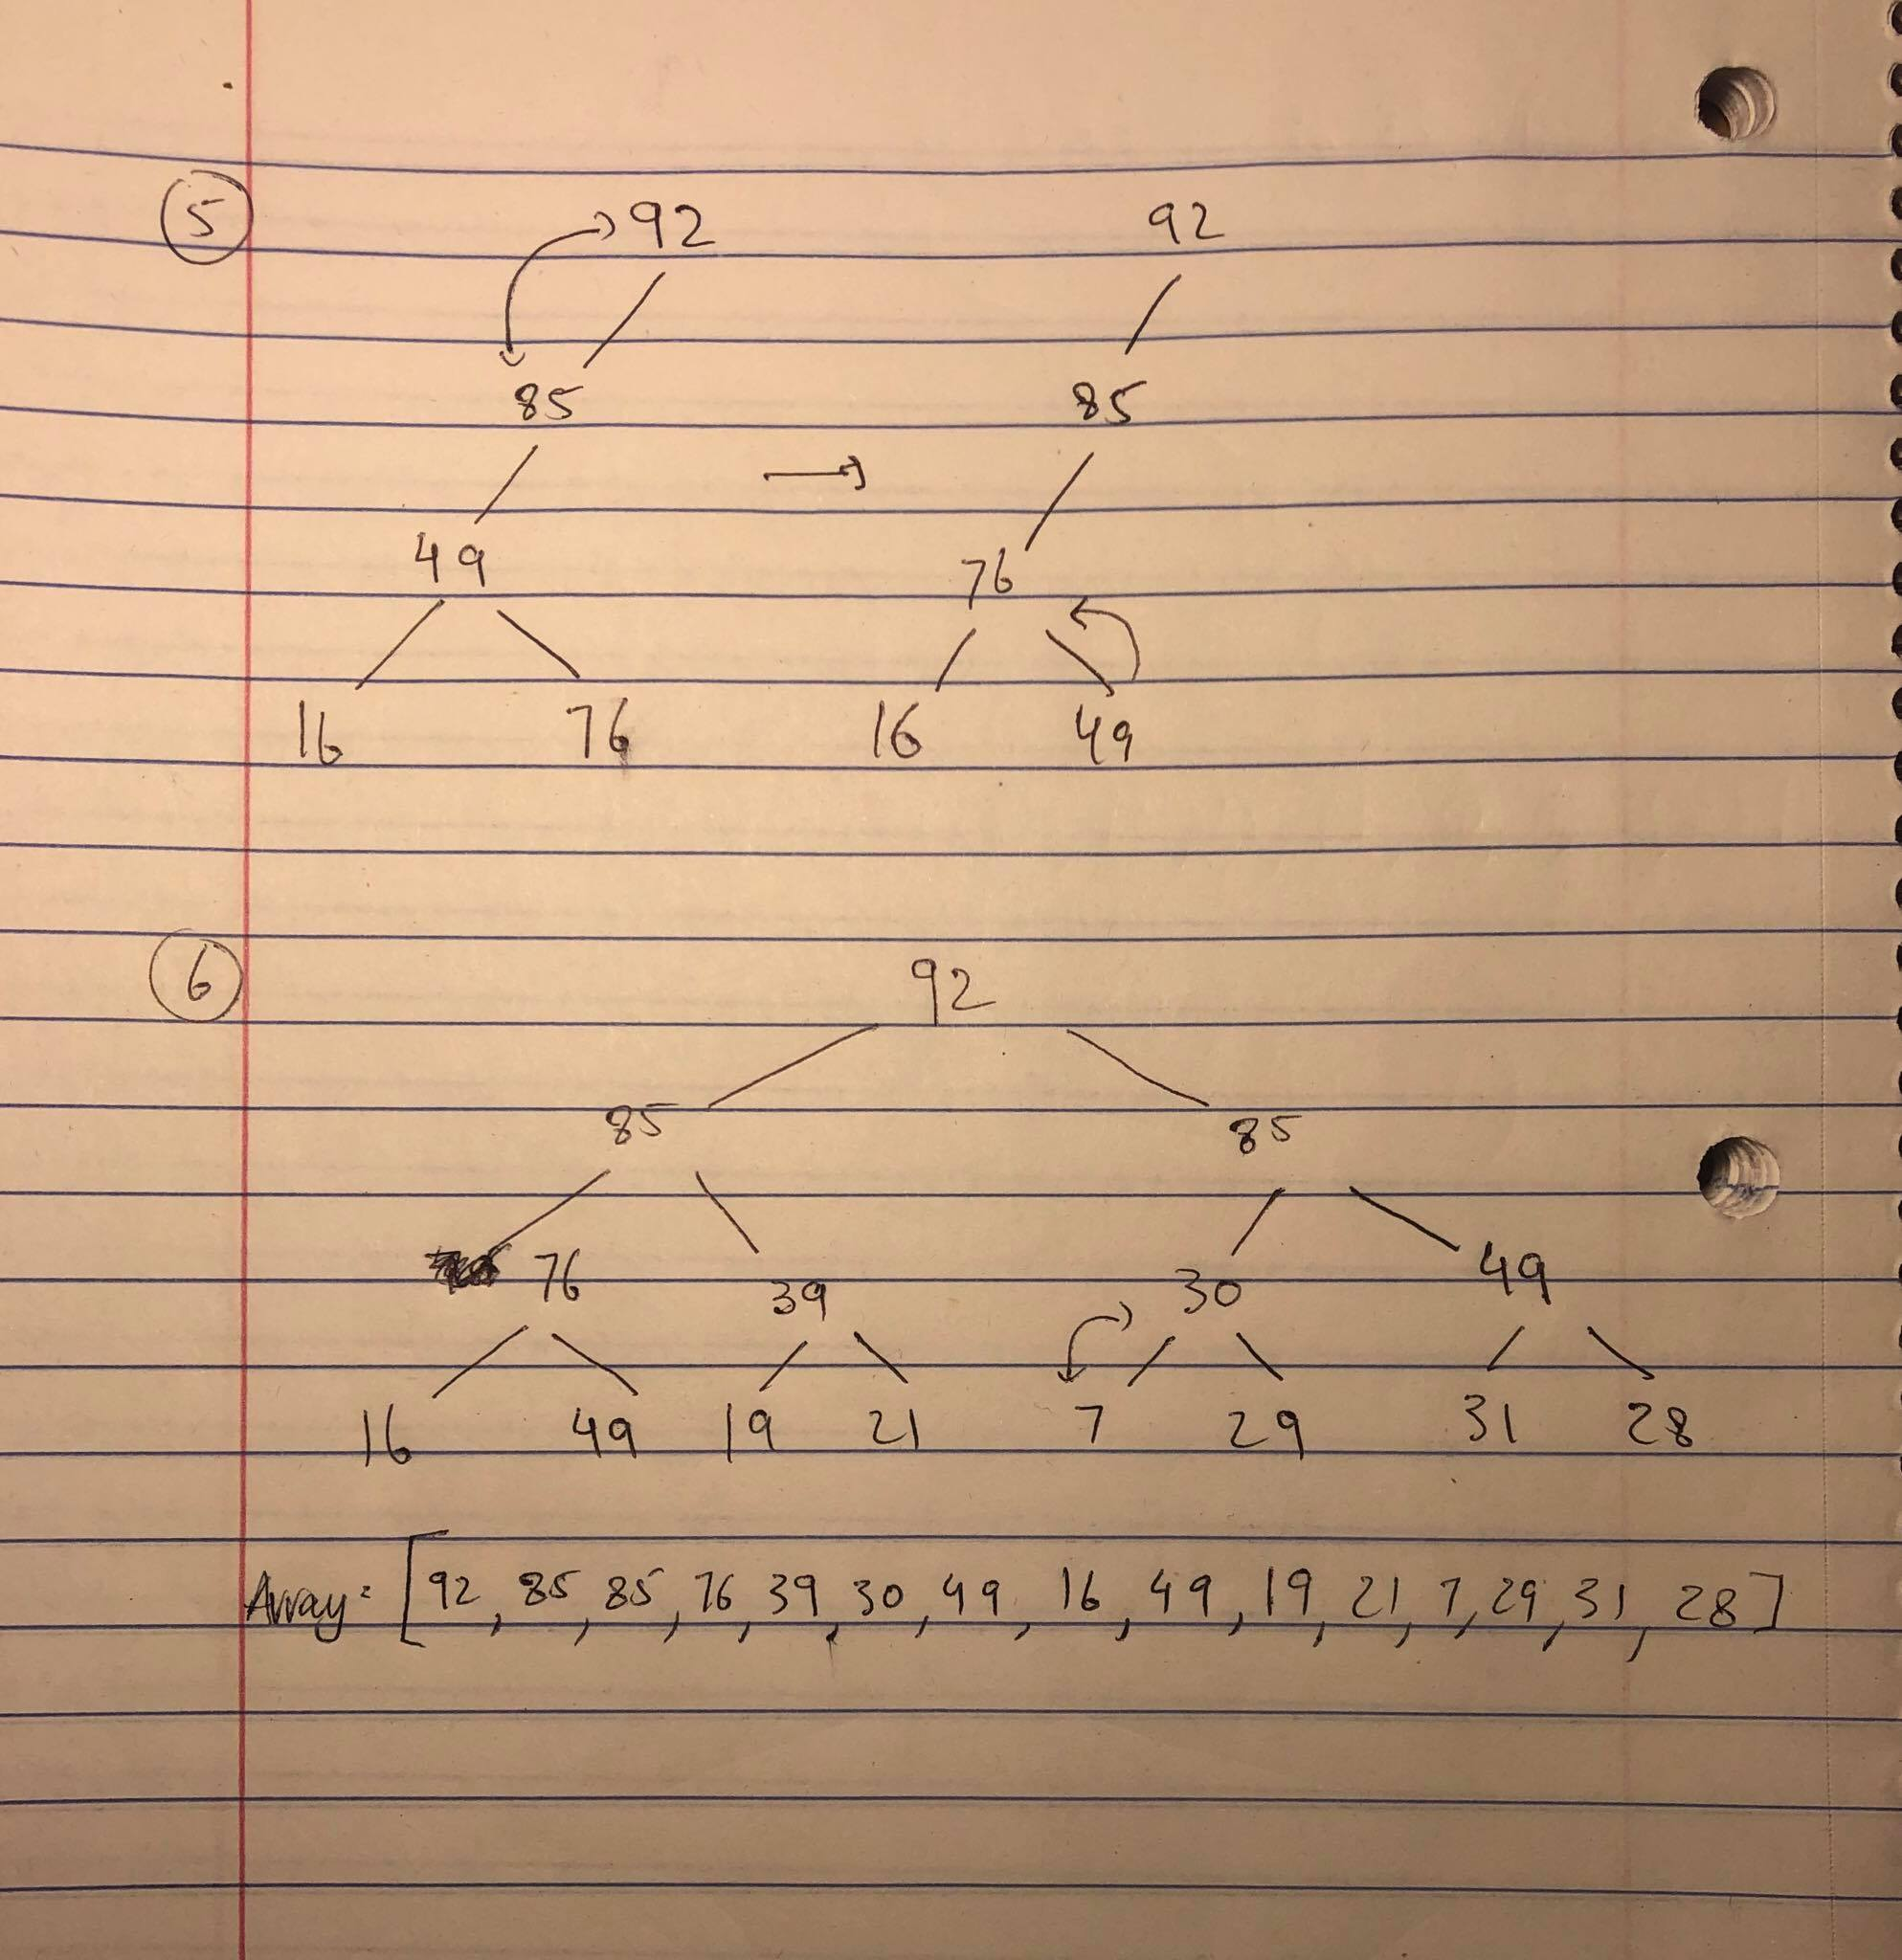

In [73]:
Image(filename='heap3.jpg')


Max heap array is [92 ,85, 85, 76, 39, 30, 49, 16, 49, 19, 21, 7, 29, 31, 28] - a useful application of max heap is that by applying the rules of removing the root from a heap and replacing it by the last leaf, and then transforming the heap into a valid max heap again,all the roots are removed in a sorted manner - starting from big to last. So for example if in this max heap we start by removing 92, it will be replaced by the last leaf which is 28, 28 will go all the way down in 49s place be replaced by 85. 76 will take 85s place and 49 will take 76's. If we repeat the process, 85 will be removed and 31 will take it's place. If we repeat this process for all leaves, we will sort this entire array from highest to lowest (we have to be careful that each time a root comes out we append it before the previous one so it should look like [92] , [85,92], [....85,92]

## Question 2. 

Consider the following questions on the $MAX-HEAPIFY$ operation.

### Question 2a [time estimate: 5 minutes]

In the pseudocode of $MAX-HEAPIFY$ (Cormen et al., p.154, or you can view it [here](https://drive.google.com/open?id=1e_3jsX4-qQCfZXKMok_T6LPFh9FwtmT5)), what does A.heap-size mean and what is the idea behind the local variable largest? 


A.heap-size is the total number of elements in the array. We have to use many comparisons and create many branches of parents and children. Comparisons also require the length of the heap to be labeled so that each parent can be compared to its children and swapped if necessary. Therefore, the A.heap-size is necessary to account for all elements.
The local largest variable is the comparator. To get a max heap, we know that each child should be lesser than its parent, and we have to store these comparisons in a local variable so that the recursion allows for all parents and childrens to be compared. Thus, if the child is bigger, it gets swapped and replaces the variable & vice versa.

### Question 2b [time estimate: 2 minutes]

The functions $LEFT(i)$ and $RIGHT(i)$, lines 1 and 2 in the $MAX-HEAPIFY$ pseudocode, return the array index of the left and right child, respectively, of a node in a binary tree. From reading Section 6.1, you know that the input to both functions is an integer number, $i$, which corresponds to the array index of the parent node in the array. Review Section 6.1 for more information. Write a Python implementation of the functions $LEFT(i)$ and $RIGHT(i)$ by filling in the cells below.

In [18]:
def left(i):
    return 2*i + 1
    raise NotImplementedError()

In [19]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

In [20]:
def right(i):
    return 2*i + 2
    raise NotImplementedError()

In [21]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

### Question 2c [time estimate: 10 minutes]

Write a Python implementation of the MAX-HEAPIFY operation using the pseudocode above, and your newly written functions, `left` and `right`.

In [58]:
def heapify(heap, i):
    """
    Parameters
    ----------
    heap : list of floats
        Assume that the heap size is the length of the heap
        
    Note
    ----
    No output is needed. This function should modify (if necessary) 
    heap in-place.
    
    """  ###following pseudocode from cormen et al
    l = left(i)    #left branch
    r = right(i)   #right branch
    heapsize = len(heap)-1
    
    #comparison in left branch, making sure to stay at correct node
    if l <= heapsize and heap[l] > heap[i]: 
        
        maximum = l   #assign child as bigger value
    else:
        maximum = i   #assign parent
        
        
    #comparison in right branch    
    if r <= heapsize and heap[r] > heap[maximum]:
        maximum = r
        
    #swapping parent and children in the case of one of them being bigger
    if maximum != i:
        heap[i],heap[maximum] = heap[maximum],heap[i]
    
    #calling the function again after swapping has happened
        heapify(heap, maximum)
    
    return(heap)

   

In [59]:
A = [39, 85, 85, 16, 49, 7, 49, 92, 76, 15, 21, 30, 29, 31, 28]
heapify(A,0)
assert(A == [85, 49, 85, 16, 39, 7, 49, 92, 76, 15, 21, 30, 29, 31, 28])


## Question 3 [time estimate: 3 minutes] 

Next, write a Python implementation of the BUILD_MAX_HEAP operation using the pseudocode provided in Section 6.3 of Cormen et. al. Test your Python implementation using the array in problem 1, and make sure your Python codes produce a valid max heap.

In [43]:
def build_max_heap(A):
    """
    Parameters
    ----------
    A : a list of floats
    
    Note
    ----
    No output is needed. The function should turn A into 
    a valid max heap, in-place.
    
    """
    #for loop, start value is half of the length of array, end value is -1 and -1 is the range
    heapsize = len(A)//2
    for i in range(heapsize, -1,-1):  
        heapify(A,i)
        
    return A
        
    raise NotImplementedError()

In [44]:
A = [4, 1, 3, 2, 16, 9, 10, 14, 8, 7]
build_max_heap(A)
assert(A == [16, 14, 10, 8, 7, 9, 3, 2, 4, 1])

## Question 4 [time estimate: 7 minutes]

Lastly, write Python implementations of the $MIN-HEAPIFY$ and $BUILD-MIN-HEAP$ operations for a min heap data structure. You can use your $MAX-HEAPIFY$ and $BUILD-MAX-HEAP$ Python function as models, just remember that the latter two functions support operations for the max heap data structure. Test your Python implementation of $BUILD-MIN-HEAP$ using the array in problem 1, and make sure your Python codes produce a valid min heap. 

In [60]:
def min_heapify(heap, i):
    """
    Parameters
    ----------
    heap : a list of floats
        Assume that the heap size is the length of the heap.
    
    Note
    ----
    No output is needed. This function should modify (if necessary) 
    heap in-place.
    
    """
    l = left(i)    #left branch
    r = right(i)   #right branch
    heapsize = len(heap)-1
    #comparison in left branch, making sure to stay at correct node
    if l <= heapsize and heap[l] < heap[i]: 
        
        minimum = l   #assign child as bigger value
    else:
        minimum = i   #assign parent
        
        
    #comparison in right branch    
    if r <= heapsize and heap[r] < heap[minimum]:
        minimum = r
        
    #swapping parent and children in the case of one of them being bigger
    if minimum != i:
        heap[i],heap[minimum] = heap[minimum],heap[i]
    
    #calling the function again after swapping has happened
        min_heapify(heap, minimum)
    
    return(heap)

    raise NotImplementedError()

In [61]:
def build_min_heap(A):
    """
    Parameters
    ----------
    A : a list of floats
    
    Note
    ----
    No output is needed. The function should turn A into 
    a valid min heap, in-place.
    
    """
    heapsize = len(A)//2-2
    for i in range(heapsize, -1,-1):  
        min_heapify(A,i)
        
    return A
    raise NotImplementedError()
    
A = [39, 85, 85, 16, 49, 7, 49, 92, 76, 15, 21, 30, 29, 31, 28]
print(build_min_heap(A))

[7, 15, 29, 16, 21, 30, 49, 92, 76, 49, 85, 39, 85, 31, 28]


In [ ]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 